<a href="https://colab.research.google.com/github/17092003vamsi/HUNTERs/blob/main/21%20ecg%202%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Total samples: 909, Total classes: 4
✅ RF Training Accuracy: 100.00%
✅ RF Testing Accuracy: 89.56%

✅ RF Classification Report:
                                                                  precision    recall  f1-score   support

      ECG Images of Myocardial Infarction Patients (240x12=2880)       1.00      1.00      1.00        46
     ECG Images of Patient that have History of MI (172x12=2064)       0.94      0.85      0.89        34
ECG Images of Patient that have abnormal heartbeat (233x12=2796)       0.92      0.73      0.81        45
                          Normal Person ECG Images (284x12=3408)       0.80      0.96      0.87        57

                                                        accuracy                           0.90       182
                                                       macro avg       0.91      0.89      0.90       1

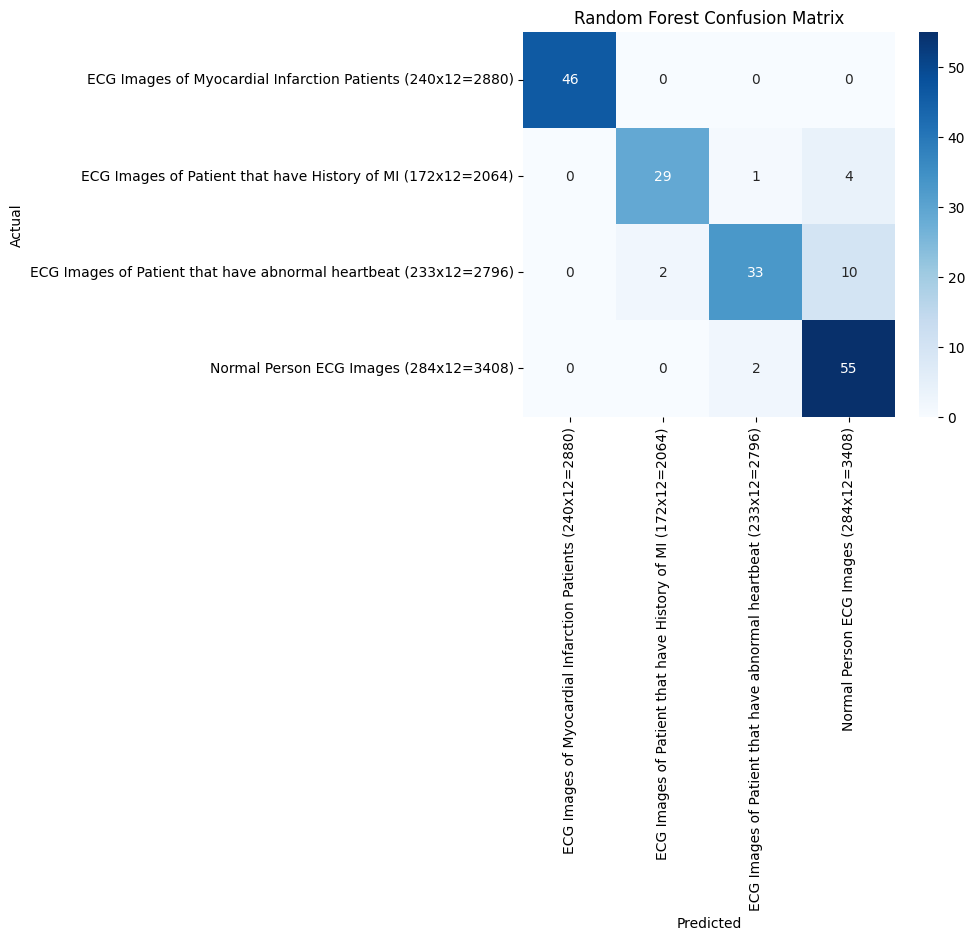

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 798ms/step - accuracy: 0.2826 - loss: 2.7748 - val_accuracy: 0.2466 - val_loss: 1.3857
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 810ms/step - accuracy: 0.2659 - loss: 1.3837 - val_accuracy: 0.5068 - val_loss: 1.3825
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 788ms/step - accuracy: 0.2893 - loss: 1.3841 - val_accuracy: 0.3973 - val_loss: 1.3809
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 775ms/step - accuracy: 0.2826 - loss: 1.3817 - val_accuracy: 0.1644 - val_loss: 1.3790
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 826ms/step - accuracy: 0.2985 - loss: 1.3662 - val_accuracy: 0.4521 - val_loss: 1.2503
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 772ms/step - accuracy: 0.4708 - loss: 1.1954 - val_accuracy: 0.5616 - val_loss: 1.0581
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 815ms/step - accuracy: 0.5921 - loss: 0.9620 - val_accuracy: 0.7397 - val_loss: 0.7531
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 779ms/step - accuracy: 0.7533 - loss: 0.6669 - val_accu

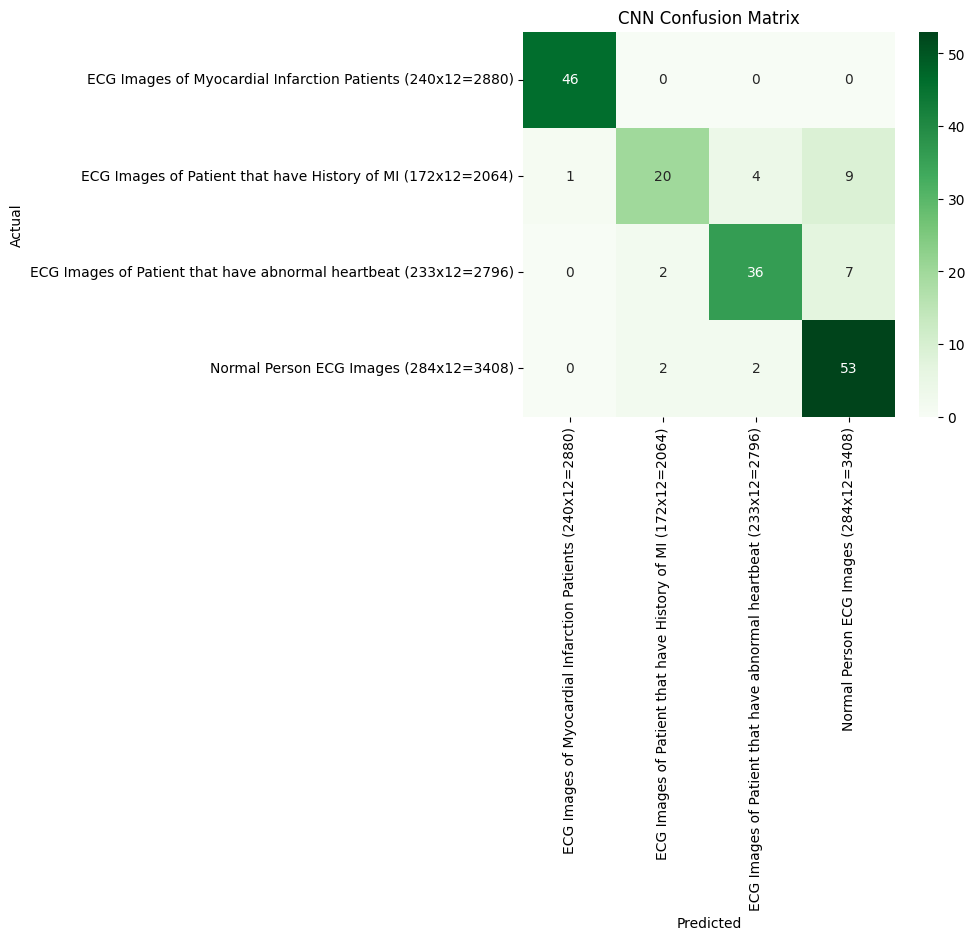

✅ RF Model saved to: /content/drive/MyDrive/ecg_rf_model.pkl
✅ CNN Model saved to: /content/drive/MyDrive/ecg_cnn_model.h5


In [2]:
# ✅ Install Required Libraries
!pip install -q scikit-image opencv-python tensorflow

# ✅ Imports
import os
import cv2
import joblib
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from skimage.feature import hog
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# ✅ Mount Google Drive
drive.mount('/content/drive')

# ✅ Parameters
IMG_SIZE = (128, 128)
DATASET_PATH = "/content/drive/MyDrive/dataset of ecg project"
CATEGORIES = sorted(os.listdir(DATASET_PATH))

# ✅ Data Preparation for Random Forest (HOG Features)
X, y, images = [], [], []
label_map = {cat: idx for idx, cat in enumerate(CATEGORIES)}

for label in CATEGORIES:
    folder = os.path.join(DATASET_PATH, label)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, IMG_SIZE)
            features, _ = hog(img, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), block_norm='L2-Hys',
                              visualize=True)
            X.append(features)
            y.append(label_map[label])
            images.append(img)

X = np.array(X)
y = np.array(y)
images = np.array(images)
print(f"✅ Total samples: {len(X)}, Total classes: {len(CATEGORIES)}")

# ✅ Train/Test Split
X_train, X_test, y_train, y_test, img_train, img_test = train_test_split(
    X, y, images, test_size=0.2, stratify=y, random_state=42)

# ✅ Train Random Forest
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

# ✅ Random Forest Accuracy
train_acc_rf = rf_model.score(X_train, y_train)
test_acc_rf = rf_model.score(X_test, y_test)
print(f"✅ RF Training Accuracy: {train_acc_rf * 100:.2f}%")
print(f"✅ RF Testing Accuracy: {test_acc_rf * 100:.2f}%")

# ✅ RF Classification Report & Confusion Matrix
y_pred_rf = rf_model.predict(X_test)
print("\n✅ RF Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=CATEGORIES))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ CNN Data Preparation
images = np.expand_dims(images, axis=-1) / 255.0  # Normalize and add channel
y_cat = to_categorical(y, num_classes=len(CATEGORIES))

X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
    images, y_cat, test_size=0.2, stratify=y, random_state=42)

# ✅ CNN Model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(len(CATEGORIES), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# ✅ CNN Evaluation
loss, test_acc_cnn = cnn_model.evaluate(X_test_cnn, y_test_cnn)
print(f"✅ CNN Testing Accuracy: {test_acc_cnn * 100:.2f}%")

# ✅ CNN Classification Report & Confusion Matrix
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn_labels = np.argmax(y_pred_cnn, axis=1)
y_true_cnn = np.argmax(y_test_cnn, axis=1)

print("\n✅ CNN Classification Report:")
print(classification_report(y_true_cnn, y_pred_cnn_labels, target_names=CATEGORIES))

cm_cnn = confusion_matrix(y_true_cnn, y_pred_cnn_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Greens', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ Save Random Forest Model
rf_path = '/content/drive/MyDrive/ecg_rf_model.pkl'
joblib.dump(rf_model, rf_path)
print(f"✅ RF Model saved to: {rf_path}")

# ✅ Save CNN Model
cnn_path = '/content/drive/MyDrive/ecg_cnn_model.h5'
cnn_model.save(cnn_path)
print(f"✅ CNN Model saved to: {cnn_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Total samples: 909, Total classes: 4
✅ RF Training Accuracy: 100.00%
✅ RF Testing Accuracy: 89.56%

✅ RF Classification Report:
                                                                  precision    recall  f1-score   support

      ECG Images of Myocardial Infarction Patients (240x12=2880)       1.00      1.00      1.00        46
     ECG Images of Patient that have History of MI (172x12=2064)       0.94      0.85      0.89        34
ECG Images of Patient that have abnormal heartbeat (233x12=2796)       0.92      0.73      0.81        45
                          Normal Person ECG Images (284x12=3408)       0.80      0.96      0.87        57

                                                        accuracy                           0.90       182
                                                       macro avg       0.91      0.89      0.90       1

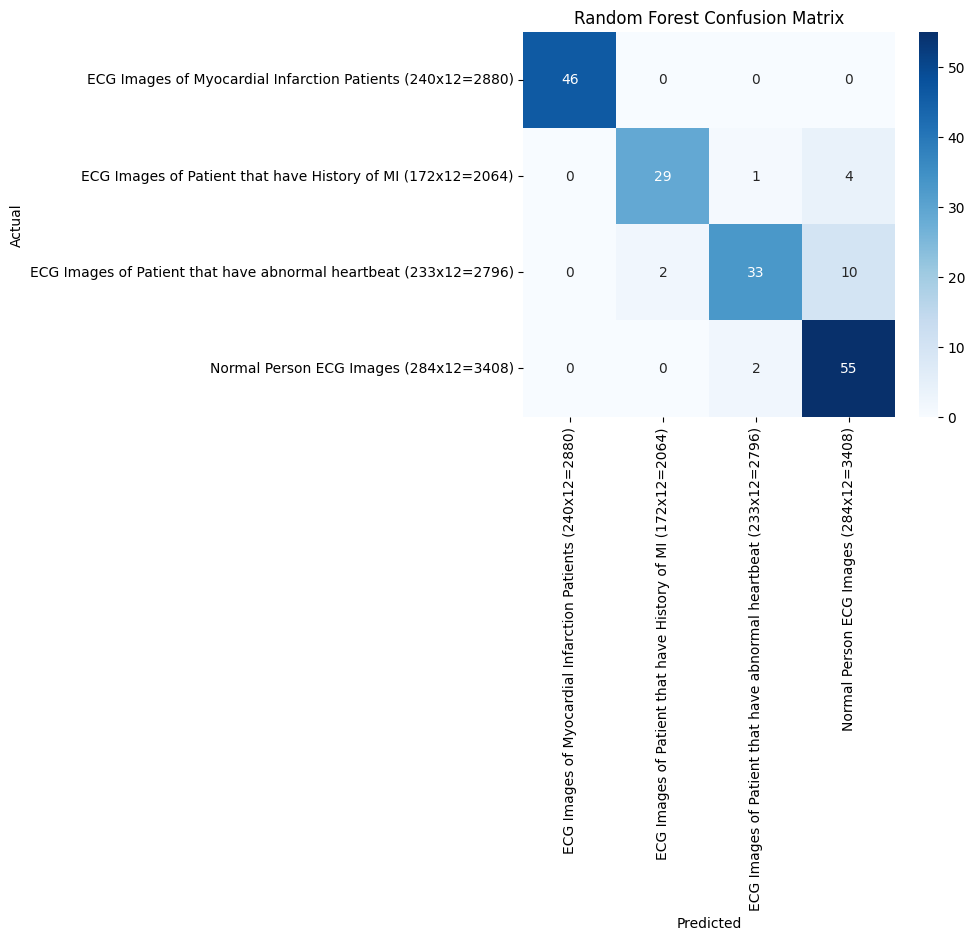

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 805ms/step - accuracy: 0.2311 - loss: 2.3291 - val_accuracy: 0.1644 - val_loss: 1.3800
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 816ms/step - accuracy: 0.2545 - loss: 1.3764 - val_accuracy: 0.5753 - val_loss: 1.3460
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 766ms/step - accuracy: 0.3415 - loss: 1.3666 - val_accuracy: 0.6712 - val_loss: 1.2668
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 786ms/step - accuracy: 0.5131 - loss: 1.2299 - val_accuracy: 0.7123 - val_loss: 1.0452
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 766ms/step - accuracy: 0.6565 - loss: 0.9347 - val_accuracy: 0.8356 - val_loss: 0.7580
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 758ms/step - accuracy: 0.7495 - loss: 0.7083 - val_accuracy: 0.7808 - val_loss: 0.6599
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 756ms/step - accuracy: 0.8077 - loss: 0.5479 - val_accuracy: 0.8630 - val_loss: 0.3591
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8803 - loss: 0.3671 - val_accurac

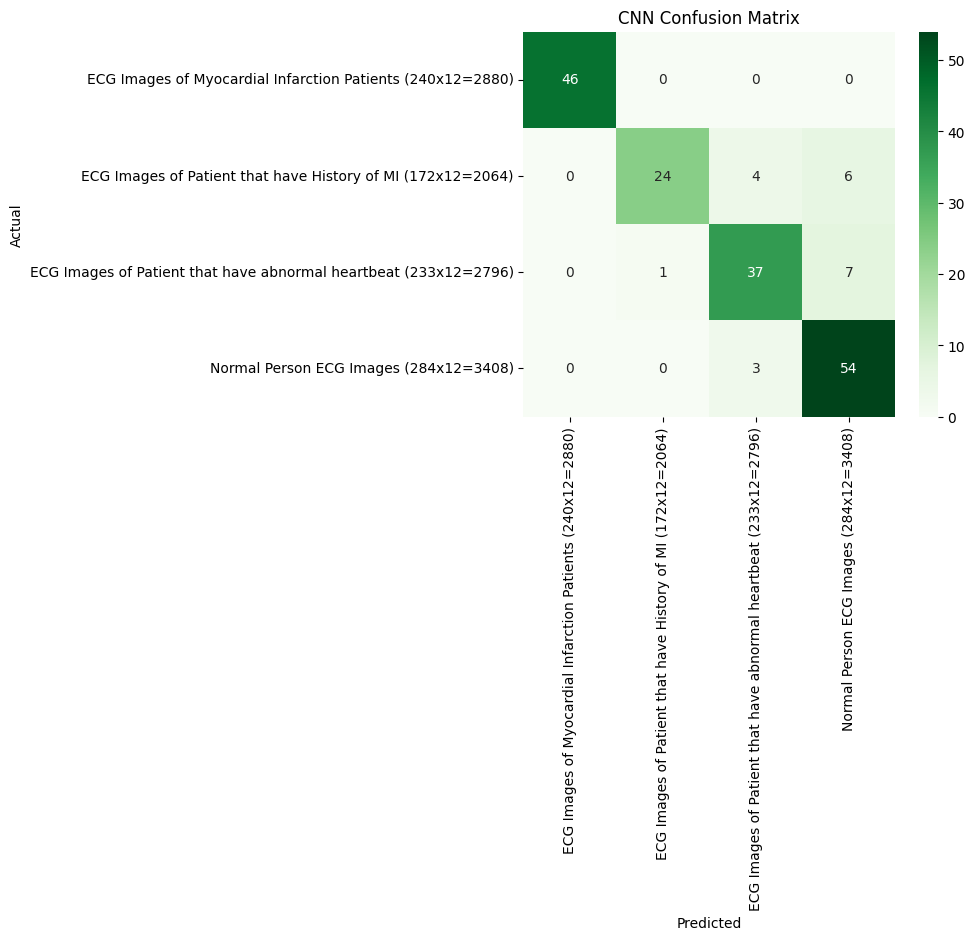

✅ RF Model saved to: /content/drive/MyDrive/ecg_rf_model.pkl
✅ CNN Model saved to: /content/drive/MyDrive/ecg_cnn_model.h5


In [3]:
# ✅ Install Required Libraries
!pip install -q scikit-image opencv-python tensorflow

# ✅ Imports
import os
import cv2
import joblib
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from skimage.feature import hog
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# ✅ Mount Google Drive
drive.mount('/content/drive')

# ✅ Parameters
IMG_SIZE = (128, 128)
DATASET_PATH = "/content/drive/MyDrive/dataset of ecg project"
CATEGORIES = sorted(os.listdir(DATASET_PATH))

# ✅ Data Preparation for Random Forest (HOG Features)
X, y, images = [], [], []
label_map = {cat: idx for idx, cat in enumerate(CATEGORIES)}

for label in CATEGORIES:
    folder = os.path.join(DATASET_PATH, label)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, IMG_SIZE)
            features, _ = hog(img, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), block_norm='L2-Hys',
                              visualize=True)
            X.append(features)
            y.append(label_map[label])
            images.append(img)

X = np.array(X)
y = np.array(y)
images = np.array(images)
print(f"✅ Total samples: {len(X)}, Total classes: {len(CATEGORIES)}")

# ✅ Train/Test Split
X_train, X_test, y_train, y_test, img_train, img_test = train_test_split(
    X, y, images, test_size=0.2, stratify=y, random_state=42)

# ✅ Train Random Forest
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

# ✅ Random Forest Accuracy
train_acc_rf = rf_model.score(X_train, y_train)
test_acc_rf = rf_model.score(X_test, y_test)
print(f"✅ RF Training Accuracy: {train_acc_rf * 100:.2f}%")
print(f"✅ RF Testing Accuracy: {test_acc_rf * 100:.2f}%")

# ✅ RF Classification Report & Confusion Matrix
y_pred_rf = rf_model.predict(X_test)
print("\n✅ RF Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=CATEGORIES))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ CNN Data Preparation
images = np.expand_dims(images, axis=-1) / 255.0  # Normalize and add channel
y_cat = to_categorical(y, num_classes=len(CATEGORIES))

X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
    images, y_cat, test_size=0.2, stratify=y, random_state=42)

# ✅ CNN Model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(len(CATEGORIES), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# ✅ CNN Evaluation
loss, test_acc_cnn = cnn_model.evaluate(X_test_cnn, y_test_cnn)
print(f"✅ CNN Testing Accuracy: {test_acc_cnn * 100:.2f}%")

# ✅ CNN Predictions & Metrics
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn_labels = np.argmax(y_pred_cnn, axis=1)
y_true_cnn = np.argmax(y_test_cnn, axis=1)

# ✅ CNN Classification Report
report_cnn = classification_report(y_true_cnn, y_pred_cnn_labels, target_names=CATEGORIES, digits=4)
print("\n📊 ✅ CNN Classification Report:\n")
print(report_cnn)

# ✅ CNN Confusion Matrix
cm_cnn = confusion_matrix(y_true_cnn, y_pred_cnn_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Greens', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ Save Random Forest Model
rf_path = '/content/drive/MyDrive/ecg_rf_model.pkl'
joblib.dump(rf_model, rf_path)
print(f"✅ RF Model saved to: {rf_path}")

# ✅ Save CNN Model
cnn_path = '/content/drive/MyDrive/ecg_cnn_model.h5'
cnn_model.save(cnn_path)
print(f"✅ CNN Model saved to: {cnn_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Total samples: 909, Total classes: 4
✅ RF Training Accuracy: 100.00%
✅ RF Testing Accuracy: 89.56%

✅ RF Classification Report:
                                                                  precision    recall  f1-score   support

      ECG Images of Myocardial Infarction Patients (240x12=2880)       1.00      1.00      1.00        46
     ECG Images of Patient that have History of MI (172x12=2064)       0.94      0.85      0.89        34
ECG Images of Patient that have abnormal heartbeat (233x12=2796)       0.92      0.73      0.81        45
                          Normal Person ECG Images (284x12=3408)       0.80      0.96      0.87        57

                                                        accuracy                           0.90       182
                                                       macro avg       0.91      0.89      0.90       1

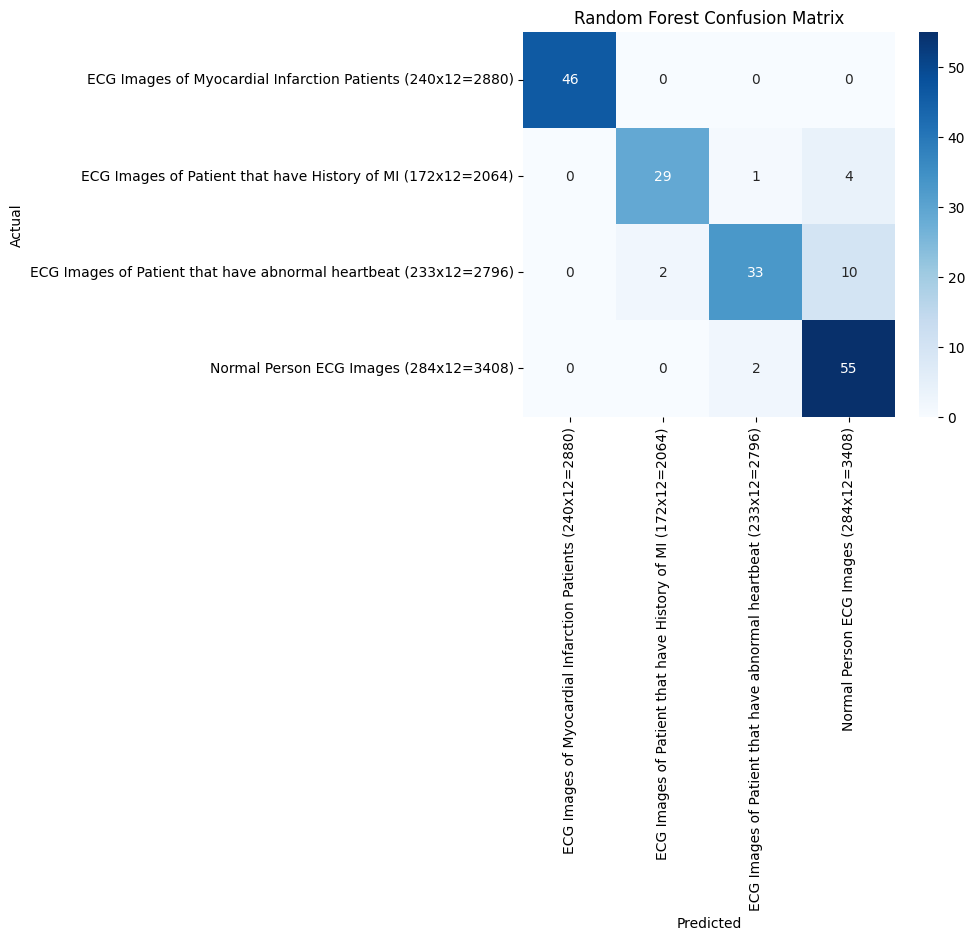

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 805ms/step - accuracy: 0.2370 - loss: 2.5954 - val_accuracy: 0.3973 - val_loss: 1.3503
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 790ms/step - accuracy: 0.2812 - loss: 1.3773 - val_accuracy: 0.4247 - val_loss: 1.3682
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 790ms/step - accuracy: 0.3286 - loss: 1.3729 - val_accuracy: 0.1644 - val_loss: 1.3685
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 781ms/step - accuracy: 0.3147 - loss: 1.3674 - val_accuracy: 0.3973 - val_loss: 1.3281
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 770ms/step - accuracy: 0.3647 - loss: 1.3379 - val_accuracy: 0.5205 - val_loss: 1.3121
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 772ms/step - accuracy: 0.4444 - loss: 1.3015 - val_accuracy: 0.5753 - val_loss: 1.1868
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 774ms/step - accuracy: 0.4798 - loss: 1.2131 - val_accuracy: 0.6164 - val_loss: 1.0265
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 772ms/step - accuracy: 0.5650 - loss: 1.0462 - val_accu

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step

📊 ✅ CNN Classification Report:

                                                                  precision    recall  f1-score   support

      ECG Images of Myocardial Infarction Patients (240x12=2880)     0.7419    1.0000    0.8519        46
     ECG Images of Patient that have History of MI (172x12=2064)     0.6316    0.7059    0.6667        34
ECG Images of Patient that have abnormal heartbeat (233x12=2796)     0.7391    0.7556    0.7473        45
                          Normal Person ECG Images (284x12=3408)     0.8889    0.5614    0.6882        57

                                                        accuracy                         0.7473       182
                                                       macro avg     0.7504    0.7557    0.7385       182
                                                    weighted avg     0.7666    0.7473    0.7401       182



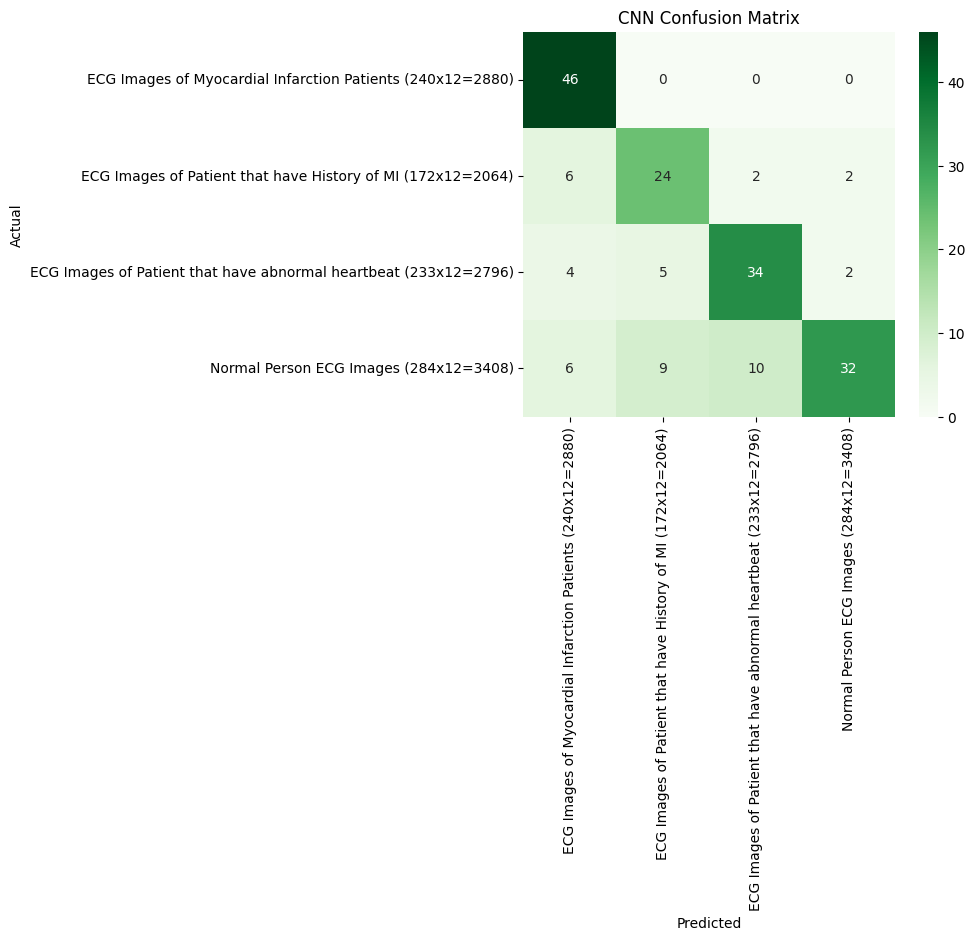

✅ RF Model saved to: /content/drive/MyDrive/ecg_rf_model.pkl
✅ CNN Model saved to: /content/drive/MyDrive/ecg_cnn_model.h5


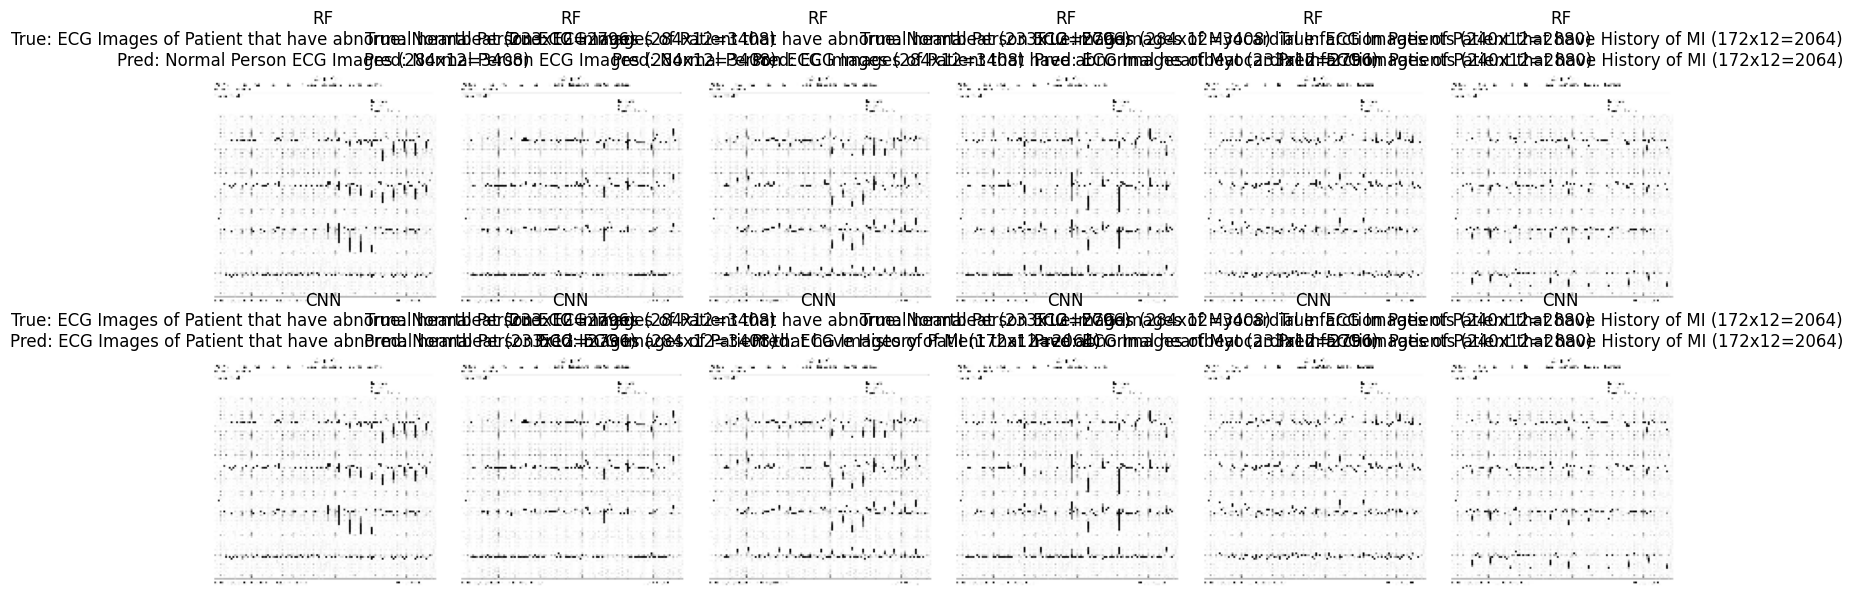

In [4]:
# ✅ Install Required Libraries
!pip install -q scikit-image opencv-python tensorflow

# ✅ Imports
import os
import cv2
import joblib
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from skimage.feature import hog
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# ✅ Mount Google Drive
drive.mount('/content/drive')

# ✅ Parameters
IMG_SIZE = (128, 128)
DATASET_PATH = "/content/drive/MyDrive/dataset of ecg project"
CATEGORIES = sorted(os.listdir(DATASET_PATH))

# ✅ Data Preparation for Random Forest (HOG Features)
X, y, images = [], [], []
label_map = {cat: idx for idx, cat in enumerate(CATEGORIES)}

for label in CATEGORIES:
    folder = os.path.join(DATASET_PATH, label)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, IMG_SIZE)
            features, _ = hog(img, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), block_norm='L2-Hys',
                              visualize=True)
            X.append(features)
            y.append(label_map[label])
            images.append(img)

X = np.array(X)
y = np.array(y)
images = np.array(images)
print(f"✅ Total samples: {len(X)}, Total classes: {len(CATEGORIES)}")

# ✅ Train/Test Split
X_train, X_test, y_train, y_test, img_train, img_test = train_test_split(
    X, y, images, test_size=0.2, stratify=y, random_state=42)

# ✅ Train Random Forest
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

# ✅ Random Forest Accuracy
train_acc_rf = rf_model.score(X_train, y_train)
test_acc_rf = rf_model.score(X_test, y_test)
print(f"✅ RF Training Accuracy: {train_acc_rf * 100:.2f}%")
print(f"✅ RF Testing Accuracy: {test_acc_rf * 100:.2f}%")

# ✅ RF Classification Report & Confusion Matrix
y_pred_rf = rf_model.predict(X_test)
print("\n✅ RF Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=CATEGORIES))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ CNN Data Preparation
images = np.expand_dims(images, axis=-1) / 255.0  # Normalize and add channel
y_cat = to_categorical(y, num_classes=len(CATEGORIES))

X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
    images, y_cat, test_size=0.2, stratify=y, random_state=42)

# ✅ CNN Model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(len(CATEGORIES), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# ✅ CNN Evaluation
loss, test_acc_cnn = cnn_model.evaluate(X_test_cnn, y_test_cnn)
print(f"✅ CNN Testing Accuracy: {test_acc_cnn * 100:.2f}%")

# ✅ CNN Predictions & Metrics
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn_labels = np.argmax(y_pred_cnn, axis=1)
y_true_cnn = np.argmax(y_test_cnn, axis=1)

# ✅ CNN Classification Report
report_cnn = classification_report(y_true_cnn, y_pred_cnn_labels, target_names=CATEGORIES, digits=4)
print("\n📊 ✅ CNN Classification Report:\n")
print(report_cnn)

# ✅ CNN Confusion Matrix
cm_cnn = confusion_matrix(y_true_cnn, y_pred_cnn_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Greens', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ Save Random Forest Model
rf_path = '/content/drive/MyDrive/ecg_rf_model.pkl'
joblib.dump(rf_model, rf_path)
print(f"✅ RF Model saved to: {rf_path}")

# ✅ Save CNN Model
cnn_path = '/content/drive/MyDrive/ecg_cnn_model.h5'
cnn_model.save(cnn_path)
print(f"✅ CNN Model saved to: {cnn_path}")

# ✅ Show Sample Predictions - Random Forest and CNN
plt.figure(figsize=(15, 6))
for i in range(6):
    # Random Forest
    img = img_test[i]
    true_label_rf = CATEGORIES[y_test[i]]
    pred_label_rf = CATEGORIES[y_pred_rf[i]]
    plt.subplot(2, 6, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"RF\nTrue: {true_label_rf}\nPred: {pred_label_rf}")
    plt.axis('off')

    # CNN
    img_cnn = X_test_cnn[i].squeeze()
    true_label_cnn = CATEGORIES[y_true_cnn[i]]
    pred_label_cnn = CATEGORIES[y_pred_cnn_labels[i]]
    plt.subplot(2, 6, i + 7)
    plt.imshow(img_cnn, cmap='gray')
    plt.title(f"CNN\nTrue: {true_label_cnn}\nPred: {pred_label_cnn}")
    plt.axis('off')

plt.tight_layout()
plt.show()
